# Baseline Model with Kaggle data: 10 epochs and 244x244 resolution

In [11]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [12]:
train_dir = '/Users/egle/neuefische/ds-capstone-for-the-birds/data_2/train/'
test_dir = '/Users/egle/neuefische/ds-capstone-for-the-birds/data_2/test/'
val_dir = '/Users/egle/neuefische/ds-capstone-for-the-birds/data_2/valid/'

In [13]:
data_dir = pathlib.Path("/Users/eglewahl/neuefische/ds-capstone-for-the-birds/data_2/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
print(class_names)

[]


In [14]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


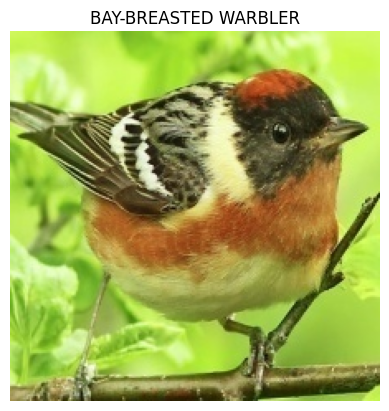

In [15]:
img = view_random_image(target_dir = train_dir,
                        target_class = 'BAY-BREASTED WARBLER'
                        ) # or we can write nike instead of converse to see converse examples

In [16]:
img.shape #(width, height, colour channels)

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


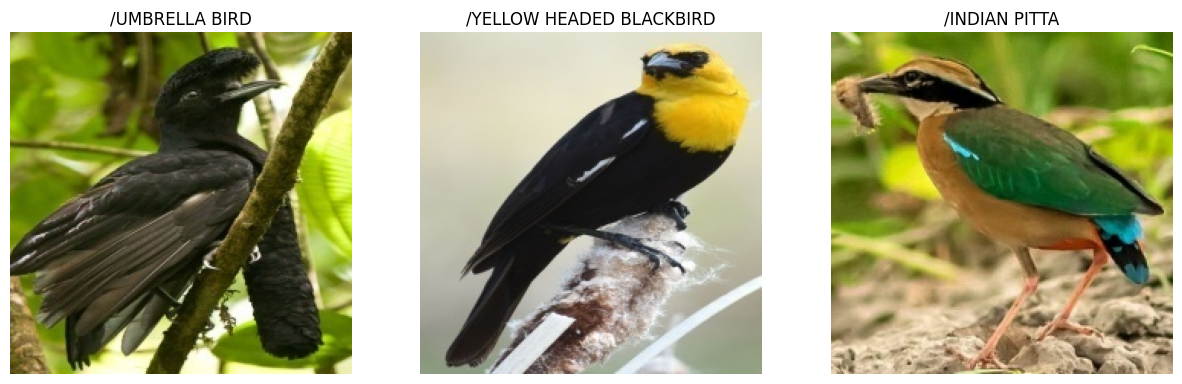

In [17]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image(train_dir, "/UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image(train_dir, "/YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image(train_dir, "/INDIAN PITTA")

## 2. Data Preprocessing

In [18]:
img_height = 244
img_width = 244

In [19]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (img_height,img_width),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size= (img_height,img_width),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size= (img_height,img_width),
                                               class_mode = "categorical")


Found 70626 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.
Found 2250 images belonging to 450 classes.


## 3.Creating and fitting the Model

In [20]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(img_height,img_width,3), name = "input-layer")

#4. Rescaling
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

Shape after passing inputs through base model: (None, 6, 6, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)


In [23]:
# 8. Combine the inputs with outputs into a model
model_p244_e10 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_p244_e10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics = ["accuracy"])


In [24]:
history = model_p244_e10.fit(train_data,
                                 epochs=10,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

Epoch 1/10


2022-10-26 21:52:59.007672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - ETA: 0s - loss: 17.8014 - accuracy: 0.6634

2022-10-26 22:02:44.720648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2208/2208 [==============================] - 593s 267ms/step - loss: 17.8014 - accuracy: 0.6634 - val_loss: 13.6815 - val_accuracy: 0.7169
Epoch 2/10
2208/2208 [==============================] - 575s 260ms/step - loss: 14.2384 - accuracy: 0.7460 - val_loss: 13.1199 - val_accuracy: 0.7610
Epoch 3/10
2208/2208 [==============================] - 607s 275ms/step - loss: 11.9691 - accuracy: 0.7870 - val_loss: 12.4263 - val_accuracy: 0.7757
Epoch 4/10
2208/2208 [==============================] - 606s 275ms/step - loss: 10.7077 - accuracy: 0.8139 - val_loss: 13.0757 - val_accuracy: 0.7886
Epoch 5/10
2208/2208 [==============================] - 616s 279ms/step - loss: 9.4842 - accuracy: 0.8350 - val_loss: 14.2877 - val_accuracy: 0.8070
Epoch 6/10
2208/2208 [==============================] - 613s 278ms/step - loss: 8.5826 - accuracy: 0.8520 - val_loss: 12.1355 - val_accuracy: 0.8180
Epoch 7/10
2208/2208 [==============================] - 603s 273ms/step - loss: 7.6514 - accuracy: 0.8676 - val_l

In [25]:
model_p244_e10.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 244, 244, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 450)               922050    
                                                                 
Total params: 22,724,834
Trainable params: 922,050
Non-trainable params: 21,802,784
_________________________________________________________________


In [26]:
model_p244_e10.evaluate(test_data)

71/71 [==============================] - 20s 275ms/step - loss: 12.1066 - accuracy: 0.8520


[12.106630325317383, 0.8519999980926514]

In [27]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

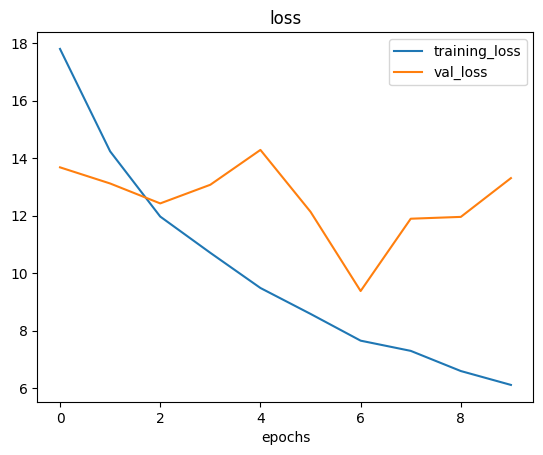

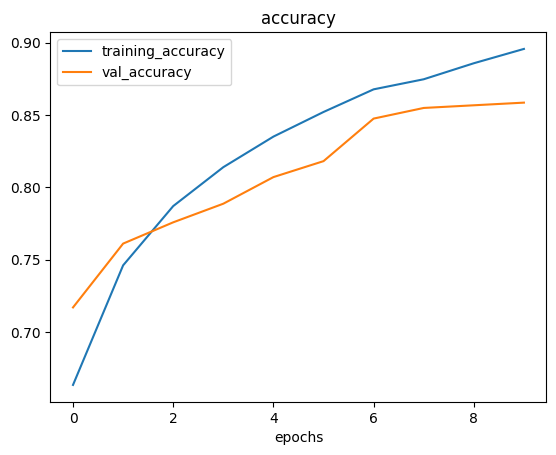

In [28]:
plot_loss_curves(history)

## 4. Freeze top layers of Base Model

In [29]:
'''
# To begin fine-tuning lets start by setting the last 10 layers as trainable
base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )
'''

'\n# To begin fine-tuning lets start by setting the last 10 layers as trainable\nbase_model.trainable = True\n\n# Un-freeze last 10 layers\nfor layer in base_model.layers[:-10]:\n  layer.trainable = False\n\n# Recompile (we have to compile model every time there is a change)\nmodel_0.compile(loss = "categorical_crossentropy",\n                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x\n                 metrics = ["accuracy"] )\n'

In [30]:
'''
# Check which layers are trainable
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)
'''

'\n# Check which layers are trainable\nfor layer_number, layer in enumerate(model_0.layers[1].layers):\n  print(layer_number, layer.name, layer.trainable)\n'

In [31]:
# Now we have unfrozen some of the layers on the top 
#print(len(model_0.trainable_variables))

## 5. Fine-Tuning and Refitting

In [32]:
'''
initial_epochs = 10
fine_tune_epochs = initial_epochs + 1

# Refit the model
history_2 = model_0.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before
'''

'\ninitial_epochs = 10\nfine_tune_epochs = initial_epochs + 1\n\n# Refit the model\nhistory_2 = model_0.fit(train_data,\n                       epochs = fine_tune_epochs,\n                       validation_data = val_data,\n                       validation_steps = int(0.25*len(val_data)),\n                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before\n'

In [33]:
#model_0.evaluate(test_data)

In [34]:
#plot_loss_curves(history_2)

## 6. Making some predictions

In [45]:
# cReating a function that preprocess the custom data

def load_and_prep_image(filename, img_shape = 244):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [36]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Add new files to the test folder 

In [50]:
test_img = "/Users/egle/neuefische/ds-capstone-for-the-birds/data_2/images to test/firefinch.jpg"
# blaumeise = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/blaumeise.jpeg"
# buchfink = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/buchfink.jpeg"
# elster = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/elster.jpeg"
# feldsperling = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/feldsperling.jpeg"
# firefinch = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/firefinch.jpg"
# gruenfink = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/grünfink.jpeg"
# haussperling = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/haussperling.jpeg"
# kohlmeise = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Kohlmeise.jpeg"
# mauersegler = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/mauersegler.jpeg"
# mehlschwalbe = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/mehlschwalbe.jpeg"
# rotkehlchen = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Rotkehlchen.jpeg"
# star = "/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/Star.jpeg"

In [51]:
pred_and_plot(model_p244_e10, test_img, class_names)

IndexError: index 5 is out of bounds for axis 0 with size 0

In [ ]:
# pred_and_plot(model_0,"/Users/friederikethies/neue_fische/ds-capstone-for-the-birds/data_2/images to test/blaumeise.jpeg", class_names)

In [44]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model_p244_e10.save('saved_model/model_p244_e10')

2022-10-27 01:32:41.039718: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/model_p244_e10/assets


INFO:tensorflow:Assets written to: saved_model/model_p244_e10/assets
